<a href="https://colab.research.google.com/github/akashsonowal/akashsonowal/blob/master/students_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import datasets 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading Data**

In [ ]:
#raw_data = pd.read_csv('/content/drive/MyDrive/Projects/04. Students Performance Analysis/datasets/student-mat.csv', sep=';')
raw_data = pd.read_csv('/content/drive/MyDrive/Projects/04. Students Performance Analysis/datasets/student-por.csv', sep=';')

#creating deep copy
df = raw_data.copy(deep=True)

**Data Info**

In [ ]:
#printing shape of the data and data info
df.drop(['G1','G2'],inplace=True, axis=1)
print('Data Shape:',df.shape, '\n')
print(df.info())
display(df.head())

Data Shape: (649, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13


In [ ]:
df.loc[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3


**Univariate Analysis:**

### Plotting for Categorical variables

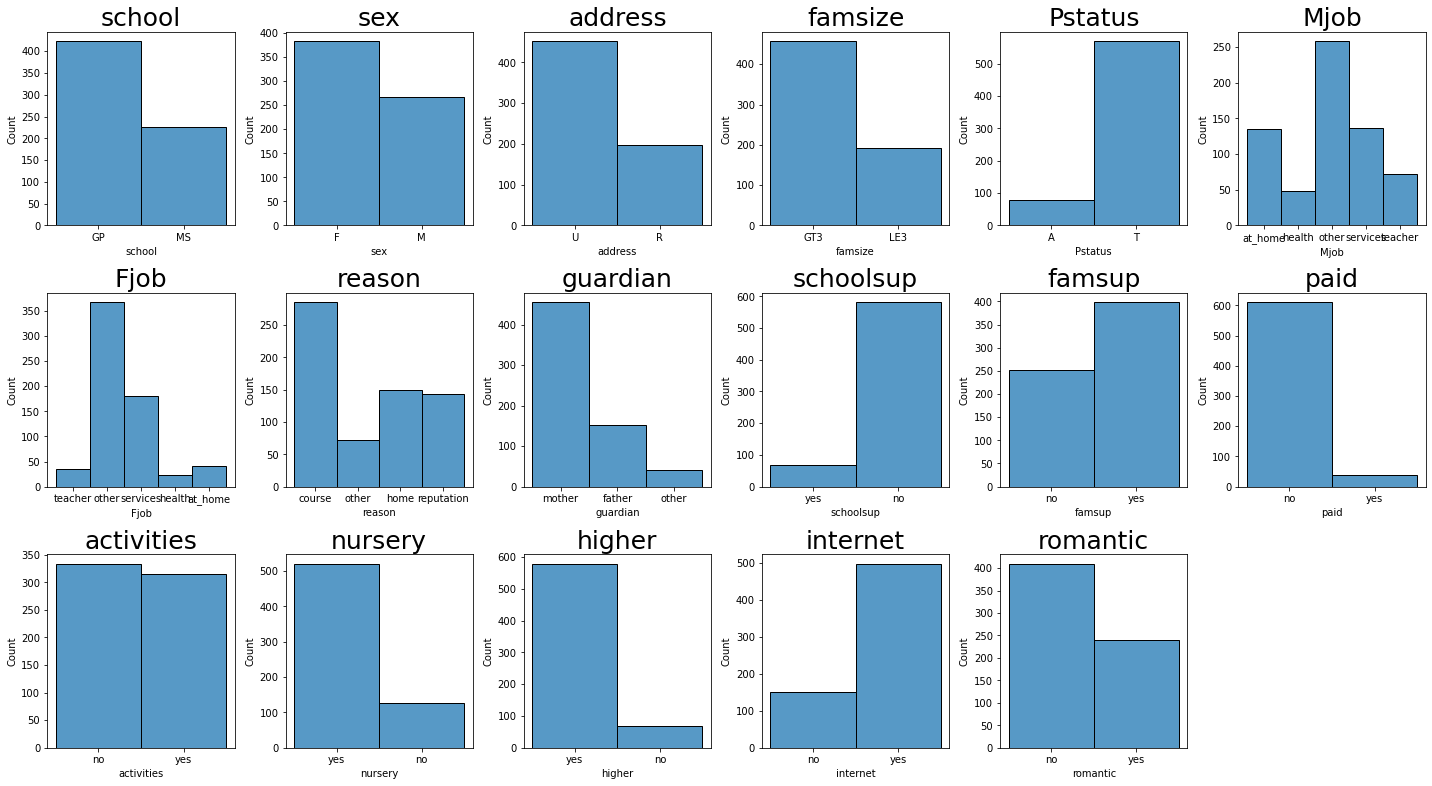

In [ ]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
cat_var = df.select_dtypes(exclude=np.number).columns.tolist()
plt.figure(figsize=(20,65))
for i in range(len(cat_var )):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,6,i+1)
    sns.histplot(df[cat_var[i]],kde=False)
    plt.tight_layout()
    plt.title(cat_var[i],fontsize=25)

plt.show()

Dividinig numeric data columns into 2 lists Ordinal and Continous data

In [ ]:
#creating ordinal columns list
ord_var = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
#creating continuous columns list
cont_var = ['age','failures','absences','G3']
#numeric 
num_var = ord_var + cont_var

### Plotting for Ordinal variables

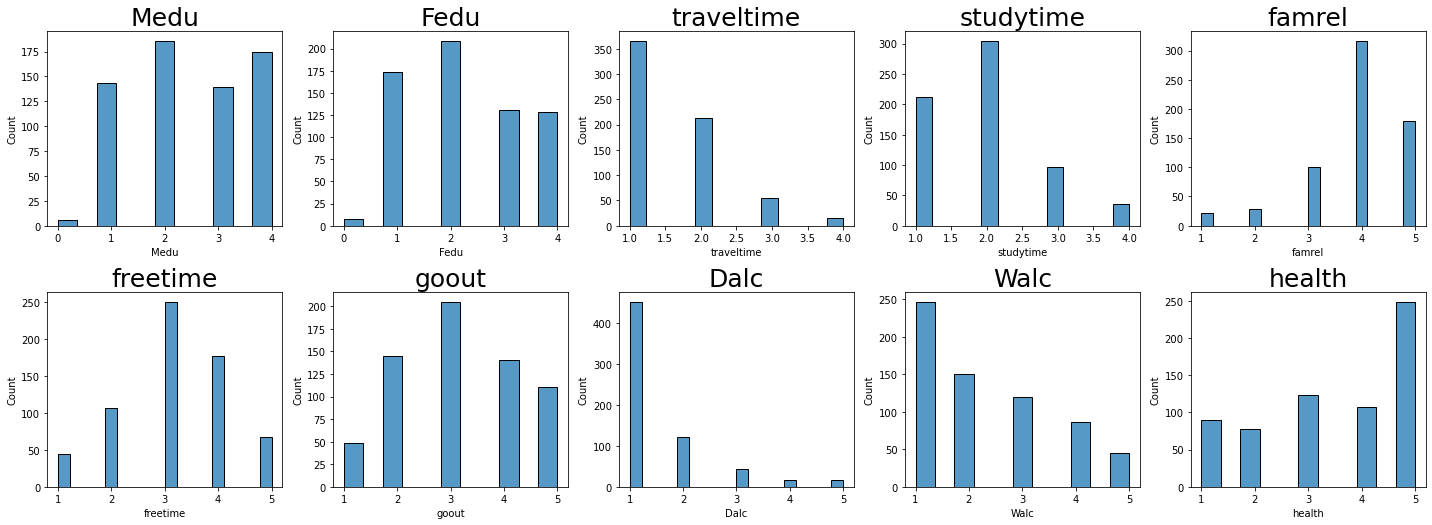

In [ ]:
plt.figure(figsize=(20,65))
for i in range(len(ord_var)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,5,i+1)
    sns.histplot(df[ord_var[i]],kde=False)
    plt.tight_layout()
    plt.title(ord_var[i],fontsize=25)

plt.show()

### Plotting for Continuous variables

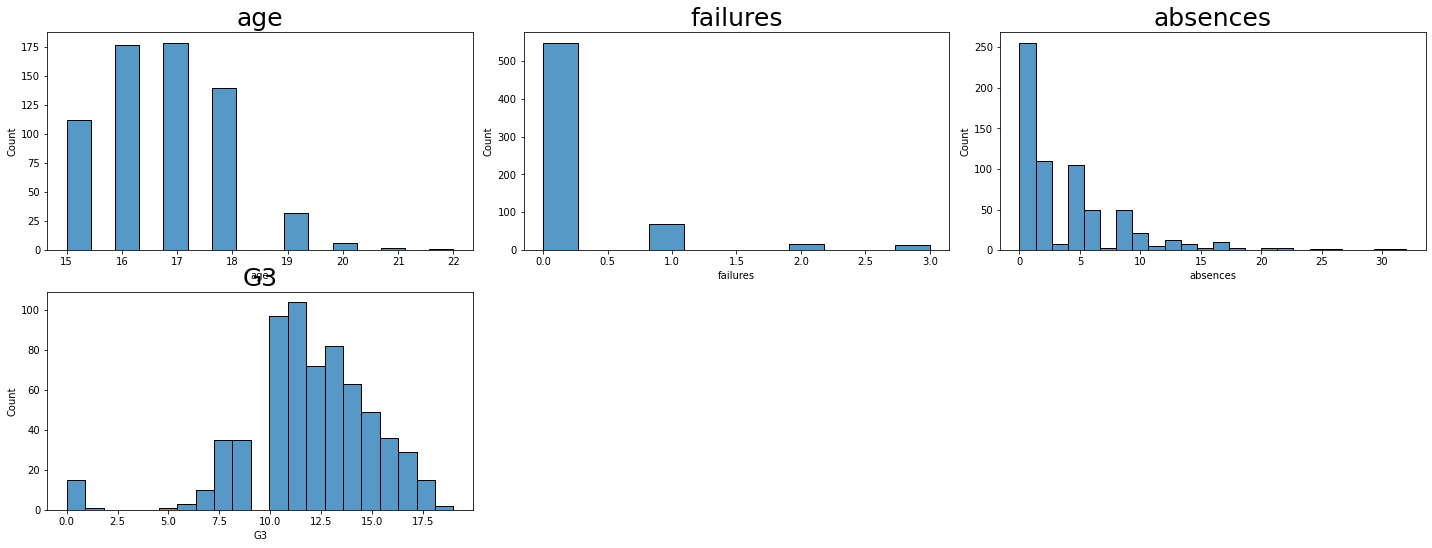

In [ ]:
plt.figure(figsize=(20,65))
for i in range(len(cont_var)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[cont_var[i]],kde=False)
    plt.tight_layout()
    plt.title(cont_var[i],fontsize=25)

plt.show()

###  Bivariate Analysis:

#### Visualization of categorical Variables

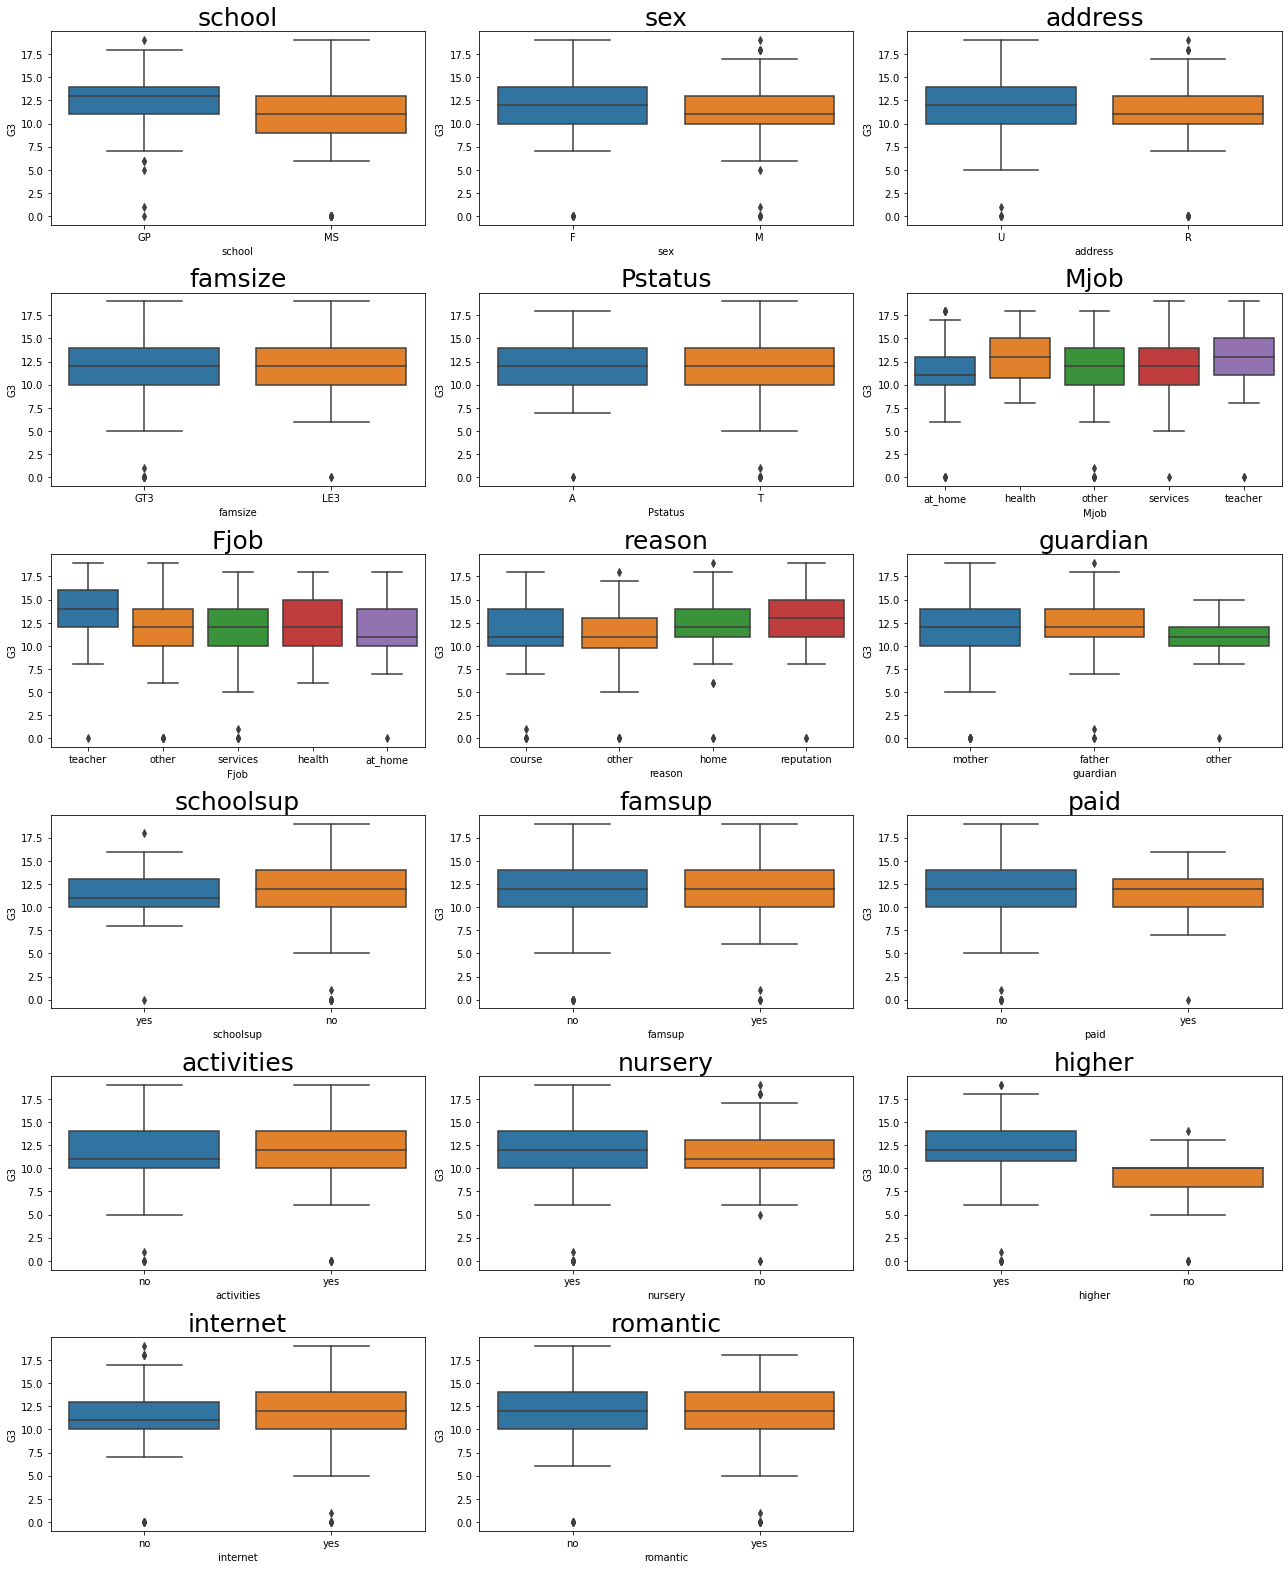

In [ ]:
plt.figure(figsize=(18,65))
for i in range(len(cat_var)):     
    plt.subplot(18,3,i+1)
    sns.boxplot(x = df[cat_var[i]], y = 'G3', data = df)
    plt.tight_layout()
    plt.title(cat_var[i],fontsize=25)

plt.show()

#### Ordinal Variables

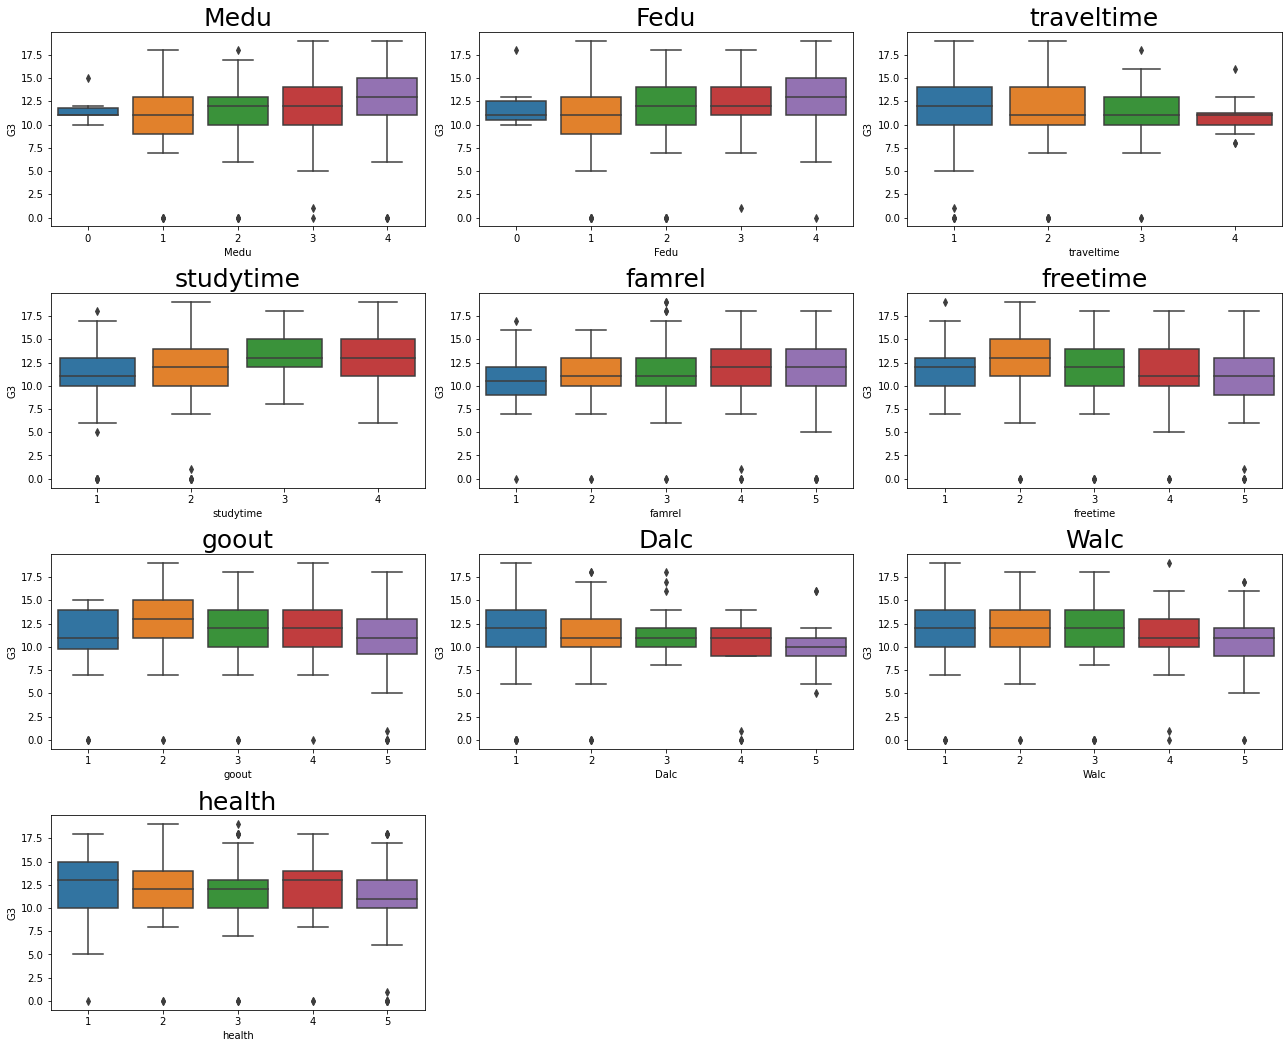

In [ ]:
plt.figure(figsize=(18,65))
for i in range(len(ord_var)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.boxplot(x = df[ord_var[i]], y = 'G3', data = df)
    plt.tight_layout()
    plt.title(ord_var[i],fontsize=25)

plt.show()

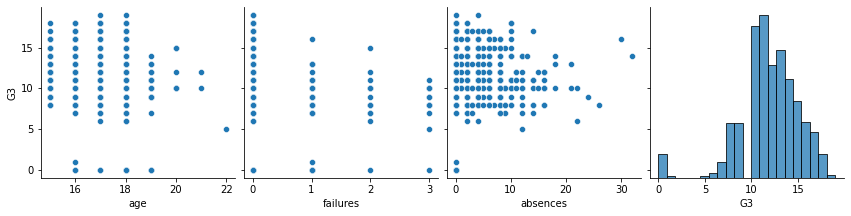

In [ ]:
#visualisation for continuous variables
sns.pairplot(df, x_vars=cont_var, y_vars='G3',size=3, aspect=1, kind='scatter')
plt.show()

### Correlation matrix to check the relationship between variables

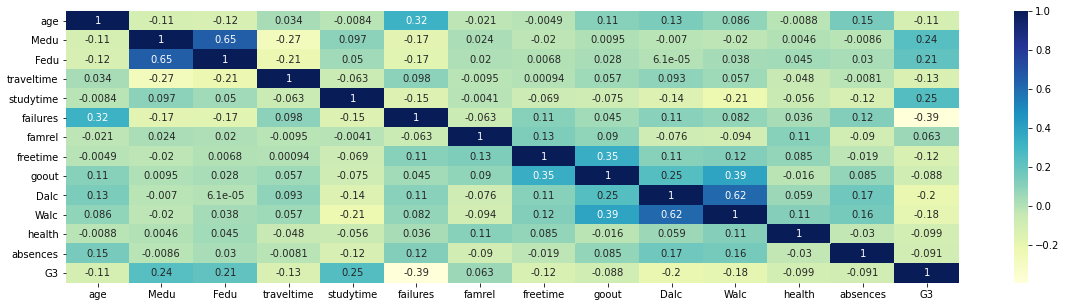

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')   #RdYlBu_r

#### Inference:

- age has low positive correlation with failure
- Medu & Fedu has moderate positive correlation & they both have low positive correlation with grades
- studytime & grades have a low positive correlation
- failure has low negative correlation with grades
- freetime has low positive correlation with goout
- goout has low positive correlation with Walc
- Walc has moderate positive correlation with Dalc and they both have negligible negative correlation

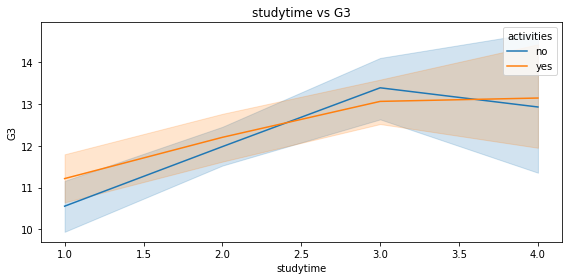

In [ ]:
plt.figure(figsize=(8,4))

plt.title('studytime vs G3')
sns.lineplot(x=df['studytime'],y=df['G3'],hue=df['activities'],legend="auto")
plt.xlabel('studytime')
plt.ylabel('G3')

plt.tight_layout()
plt.show()

#### Dummy variables

In [ ]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[cat_var])
dummies

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,1,0,1,0,0,1,...,0,1,1,0,0,1,0,1,1,0
645,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
646,0,1,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,1,0,1,0
647,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0


In [ ]:
dummies = pd.get_dummies(df[cat_var], drop_first = True)
dummies.shape

(649, 26)

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)
df.shape

(649, 57)

In [ ]:
# Drop the original cat variables as dummies are already created

df.drop(cat_var, axis = 1, inplace = True)
df.shape

(649, 40)

### Splitting the Data into Training and Testing Sets

In [ ]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

### Rescaling the Features

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
num_var = ord_var + cont_var
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [ ]:
df_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
124,-0.565313,-0.493031,-0.325919,-0.754098,0.076426,-0.351077,1.146940,0.816631,0.735926,-0.543132,...,1,0,0,0,0,0,1,1,1,1
241,0.281724,-0.493031,0.587460,-0.754098,0.076426,-0.351077,1.146940,-0.129161,-0.127408,-0.543132,...,0,0,0,1,0,0,0,1,1,0
569,1.128761,0.391697,0.587460,-0.754098,0.076426,3.230700,0.064381,0.816631,1.599261,-0.543132,...,1,0,0,1,0,1,1,0,1,0
639,1.975798,-1.377759,-1.239299,0.593778,-1.120032,1.439811,0.064381,-0.129161,-0.990743,-0.543132,...,1,0,0,0,0,0,1,1,0,0
594,1.128761,1.276425,1.500839,0.593778,0.076426,-0.351077,0.064381,-0.129161,1.599261,-0.543132,...,1,0,0,0,0,1,0,1,1,0


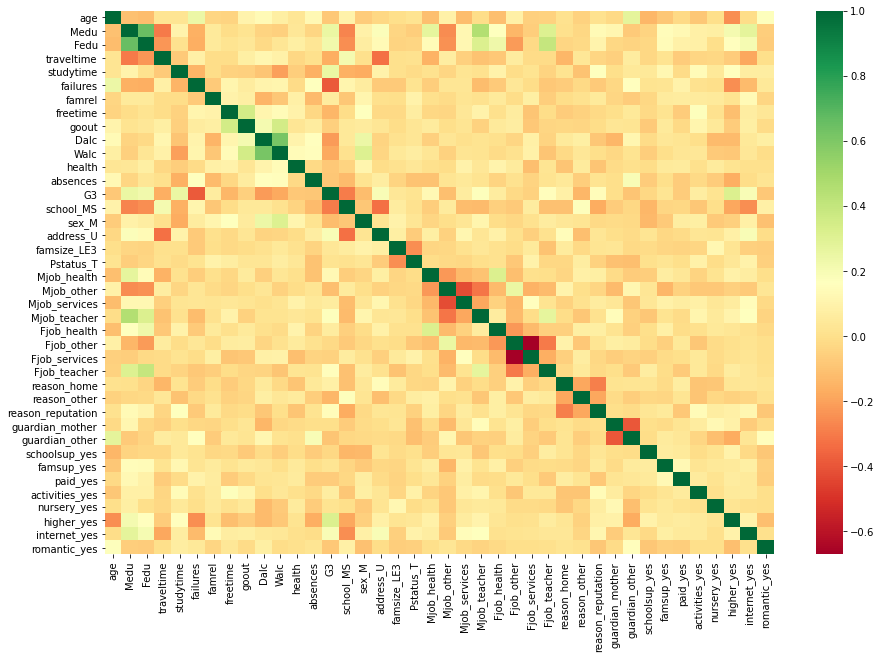

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

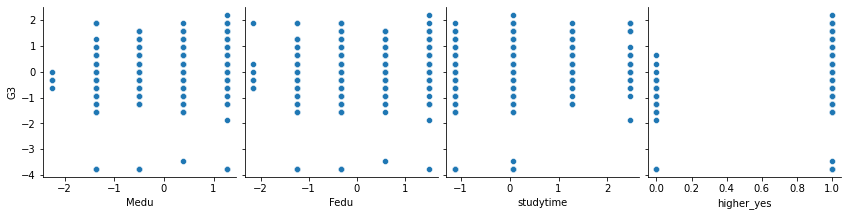

In [ ]:
# Scatter Plot of few correlated independent variables vs dependent variables
col = ['Medu','Fedu','studytime','higher_yes']
sns.pairplot(df_train, x_vars=col, y_vars='G3',size=3, aspect=1, kind='scatter')

## Building a Linear Model

In [ ]:
y_train = df_train.pop('G3')
X_train = df_train

In [ ]:
X_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
X_train_1 = X_train[['Medu','Fedu','studytime','higher_yes']]


Using only correlated variables analysed from heatmap

In [ ]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [ ]:
# Check parameters created

lr_1.params

const        -0.706317
Medu          0.105309
Fedu          0.117048
studytime     0.203838
higher_yes    0.789822
dtype: float64

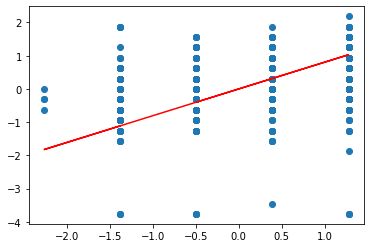

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     25.12
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           8.59e-19
Time:                        01:28:23   Log-Likelihood:                -598.36
No. Observations:                 454   AIC:                             1207.
Df Residuals:                     449   BIC:                             1227.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7063      0.135     -5.218      0.0

### Using VIF Scores:

Multicollinearity occurs when there is correlation between the predictor variables.
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. It measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. 

If VIF is 1 then there is no correlation among the predictor variables. Whereas if VIF exceeds 5, we say there is moderate multi-collinearity and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.               
Alternatively we can check the significance of a variable to the model with the p-value               

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1
Considering all variables 

In [ ]:
X_train_1 = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     6.458
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.02e-24
Time:                        01:28:24   Log-Likelihood:                -536.32
No. Observations:                 454   AIC:                             1153.
Df Residuals:                     414   BIC:                             1317.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4629      0.30

In [ ]:
checkVIF(X_train)

,Features,VIF
36,higher_yes,10.60
17,Pstatus_T,7.99
23,Fjob_other,7.57
35,nursery_yes,5.14
37,internet_yes,5.09
24,Fjob_services,4.33
29,guardian_mother,4.14
15,address_U,3.93
19,Mjob_other,3.36
32,famsup_yes,2.96


### Recursive feature elimination

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 7),
 ('Medu', False, 12),
 ('Fedu', False, 11),
 ('traveltime', False, 16),
 ('studytime', True, 1),
 ('failures', True, 1),
 ('famrel', False, 13),
 ('freetime', False, 5),
 ('goout', False, 17),
 ('Dalc', True, 1),
 ('Walc', False, 19),
 ('health', False, 8),
 ('absences', False, 18),
 ('school_MS', True, 1),
 ('sex_M', True, 1),
 ('address_U', True, 1),
 ('famsize_LE3', False, 3),
 ('Pstatus_T', False, 2),
 ('Mjob_health', True, 1),
 ('Mjob_other', False, 9),
 ('Mjob_services', True, 1),
 ('Mjob_teacher', True, 1),
 ('Fjob_health', False, 10),
 ('Fjob_other', False, 20),
 ('Fjob_services', False, 4),
 ('Fjob_teacher', True, 1),
 ('reason_home', True, 1),
 ('reason_other', True, 1),
 ('reason_reputation', False, 14),
 ('guardian_mother', True, 1),
 ('guardian_other', True, 1),
 ('schoolsup_yes', True, 1),
 ('famsup_yes', False, 21),
 ('paid_yes', True, 1),
 ('activities_yes', False, 6),
 ('nursery_yes', False, 15),
 ('higher_yes', True, 1),
 ('internet_yes', True, 1),

In [ ]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['studytime', 'failures', 'Dalc', 'school_MS', 'sex_M', 'address_U',
       'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_teacher',
       'reason_home', 'reason_other', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'paid_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

### Model 2

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [ ]:
X_train_2 = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     12.52
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           7.31e-31
Time:                        01:28:24   Log-Likelihood:                -544.96
No. Observations:                 454   AIC:                             1130.
Df Residuals:                     434   BIC:                             1212.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3401      0.191     

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_2)

,Features,VIF
0,const,24.52
4,school_MS,1.32
14,guardian_other,1.32
9,Mjob_teacher,1.31
13,guardian_mother,1.27
17,higher_yes,1.19
18,internet_yes,1.18
5,sex_M,1.18
6,address_U,1.18
8,Mjob_services,1.17


- We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
- p-value of some variables seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [ ]:
['address_U','Mjob_services','reason_home','reason_other','guardian_other','guardian_mother','schoolsup_yes','paid_yes','internet_yes','romantic_yes']

['address_U',
 'Mjob_services',
 'reason_home',
 'reason_other',
 'guardian_other',
 'guardian_mother',
 'schoolsup_yes',
 'paid_yes',
 'internet_yes',
 'romantic_yes']

In [ ]:
X_train_rfe.columns

Index(['studytime', 'failures', 'Dalc', 'school_MS', 'sex_M', 'address_U',
       'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_teacher',
       'reason_home', 'reason_other', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'paid_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

### Model 3

In [ ]:
# Dropping insignificant variables, none of them are highly correlated variables

X_train_rfe1 = X_train_rfe.drop(['guardian_other','paid_yes','reason_home','guardian_mother','Mjob_services','romantic_yes','address_U','schoolsup_yes'], 1,)

In [ ]:
X_train_3 = build_model(X_train_rfe1,y_train)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     19.93
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.13e-32
Time:                        01:28:25   Log-Likelihood:                -552.75
No. Observations:                 454   AIC:                             1130.
Df Residuals:                     442   BIC:                             1179.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4359      0.156     -2.794   

In [ ]:
#checkVIF(X_train_3)

### Model 4

In [ ]:
# Dropping insignificant variables, none of them are highly correlated variables

X_train_rfe2 = X_train_rfe1.drop(['Mjob_teacher','sex_M'],1)

In [ ]:
X_train_4 = build_model(X_train_rfe2,y_train)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     23.50
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           7.98e-33
Time:                        01:28:25   Log-Likelihood:                -555.78
No. Observations:                 454   AIC:                             1132.
Df Residuals:                     444   BIC:                             1173.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4994      0.153     -3.268   

In [ ]:
X_train_4

,const,studytime,failures,Dalc,school_MS,Mjob_health,Fjob_teacher,reason_other,higher_yes,internet_yes
124,1.0,0.076426,-0.351077,-0.543132,0,0,0,0,1,1
241,1.0,0.076426,-0.351077,-0.543132,0,0,0,0,1,1
569,1.0,0.076426,3.230700,-0.543132,1,0,0,0,0,1
639,1.0,-1.120032,1.439811,-0.543132,1,0,0,1,1,0
594,1.0,0.076426,-0.351077,-0.543132,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.076426,1.439811,0.577695,1,1,0,0,1,1
53,1.0,-1.120032,-0.351077,0.577695,0,0,0,0,1,1
350,1.0,1.272883,1.439811,-0.543132,0,0,0,0,1,1
79,1.0,0.076426,-0.351077,-0.543132,0,0,0,0,1,1


## Residual Analysis of the train data

In [ ]:
lm = sm.OLS(y_train,X_train_4).fit()
y_train_pred = lm.predict(X_train_4)

Text(0.5, 0, 'Errors')

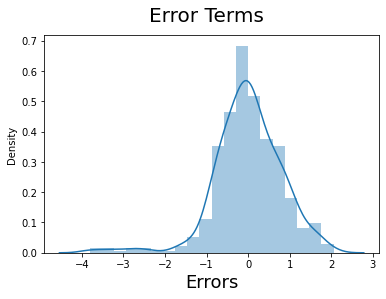

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)

### Prediction and Evaluation

In [ ]:
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [ ]:
#Dividing into X and y
y_test = df_test.pop('G3')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.
X_train_4 = X_train_4.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_4 = X_test[X_train_4.columns]

# Adding a constant variable 
X_test_4 = sm.add_constant(X_test_4)

In [ ]:
X_train_4.shape

(454, 9)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_4)

In [ ]:
#Evaluation of test via comparison of y_pred and y_test
r2_score(y_test, y_pred)

0.24525267473229329

Text(0, 0.5, 'y_pred')

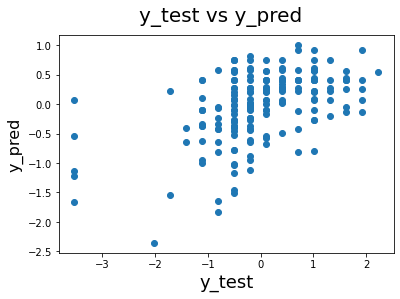

In [ ]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     23.50
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           7.98e-33
Time:                        01:28:27   Log-Likelihood:                -555.78
No. Observations:                 454   AIC:                             1132.
Df Residuals:                     444   BIC:                             1173.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4994      0.153     -3.268   